#### Exercice 1

In [9]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importer le dataset
dataset = pd.read_csv("Mall_Customers.csv")

In [7]:
# Afficher les 5 premières lignes du dataset
print("Les 5 premières lignes du dataset :")
print(dataset.head())

Les 5 premières lignes du dataset :
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
# Afficher les 5 dernières lignes du dataset
print("\nLes 5 dernières lignes du dataset :")
print(dataset.tail())


Les 5 dernières lignes du dataset :
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [13]:
# Afficher les dimensions du dataset
print("\nDimensions du dataset :")
print(dataset.shape)


Dimensions du dataset :
(200, 5)


In [19]:
# Extraire les données d'entrée X (Annual Income (k$) et Spending Score (1-100))
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
# Afficher les données d'entrée X
print("\nDonnées d'entrée X :")
print(X)


Données d'entrée X :
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]

C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window


Valeurs de WCSS pour chaque valeur de K :
K=1: WCSS=269981.28
K=2: WCSS=181363.59595959596
K=3: WCSS=106348.37306211119
K=4: WCSS=73679.78903948834
K=5: WCSS=44448.45544793371
K=6: WCSS=37265.86520484346
K=7: WCSS=30259.65720728547
K=8: WCSS=25050.832307547527
K=9: WCSS=21862.09267218289
K=10: WCSS=19657.783608703958


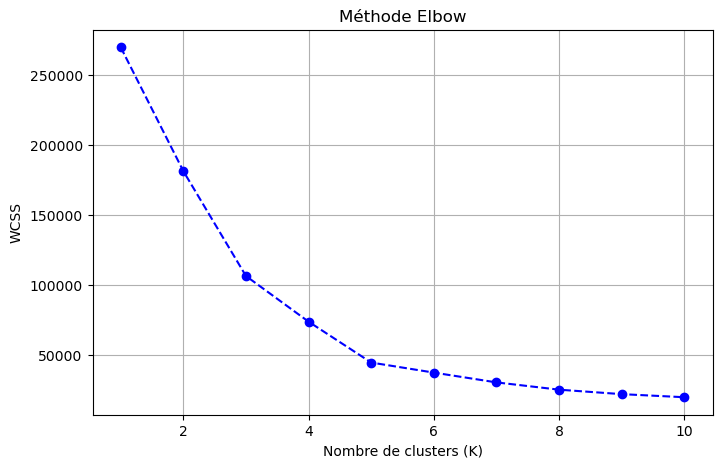

In [35]:
# Méthode Elbow pour trouver la valeur optimale de K
def elbow():
    wcss = []  # Liste pour stocker les valeurs de WCSS
    for k in range(1, 11):
        kmeans = KMeans(
            n_clusters=k, 
            init='k-means++', 
            max_iter=300, 
            n_init=10, 
            random_state=0
        )
        kmeans.fit(X)  # Ajuster le modèle aux données X
        wcss.append(kmeans.inertia_)  # Ajouter la valeur de WCSS
    
    # Affichage des résultats
    print("\nValeurs de WCSS pour chaque valeur de K :")
    for i, val in enumerate(wcss, 1):
        print(f"K={i}: WCSS={val}")
    
    # Tracer la courbe WCSS
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
    plt.title("Méthode Elbow")
    plt.xlabel("Nombre de clusters (K)")
    plt.ylabel("WCSS")
    plt.grid()
    plt.show()
# Appel de la fonction elbow()
elbow()

C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

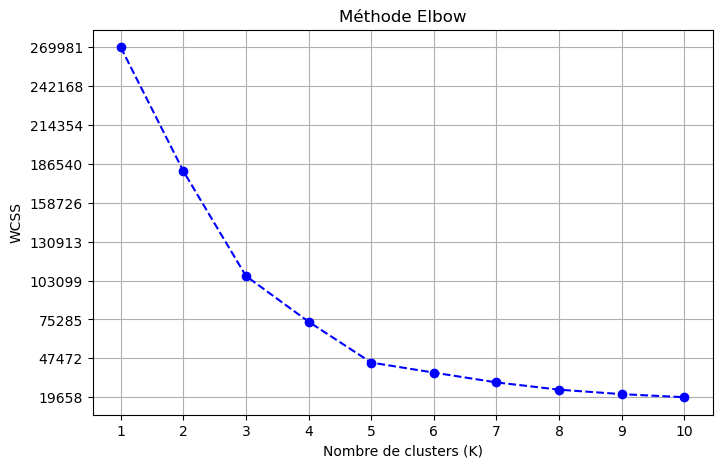

In [37]:
# Méthode Elbow pour visualiser le graphe des valeurs de WCSS
def elbow():
    wcss = []  # Liste pour stocker les valeurs de WCSS
    for k in range(1, 11):
        kmeans = KMeans(
            n_clusters=k, 
            init='k-means++', 
            max_iter=300, 
            n_init=10, 
            random_state=0
        )
        kmeans.fit(X)  # Ajuster le modèle aux données X
        wcss.append(kmeans.inertia_)  # Ajouter la valeur de WCSS

    # Tracer la courbe WCSS
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
    plt.title("Méthode Elbow")
    plt.xlabel("Nombre de clusters (K)")
    plt.ylabel("WCSS")
    plt.xticks(range(1, 11))  # Définir les valeurs sur l'axe X
    plt.yticks(np.linspace(min(wcss), max(wcss), num=10))  # Définir les valeurs sur l'axe Y
    plt.grid()
    plt.show()

# Appel de la fonction elbow()
elbow()

In [39]:
# Choisir K optimal basé sur le graphe d'Elbow (supposons K=5)
optimal_k = 5
kmeans_model = KMeans(
    n_clusters=optimal_k, 
    init='k-means++', 
    max_iter=300, 
    n_init=10, 
    random_state=0
)

# Ajuster le modèle sur les données
kmeans_model.fit(X)

# Prédire les clusters pour les données d'entrée
y_pred1 = kmeans_model.predict(X)

# Afficher les résultats de prédiction
print("\nRésultats de prédiction (y_pred1) :")
print(y_pred1)

C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Résultats de prédiction (y_pred1) :
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [41]:
# Étape 11 : Utilisation de fit_predict()
y_pred2 = kmeans_model.fit_predict(X)

# Afficher les résultats de prédiction
print("\nRésultats de prédiction avec fit_predict (y_pred2) :")
print(y_pred2)

C:\Users\eloua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Résultats de prédiction avec fit_predict (y_pred2) :
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


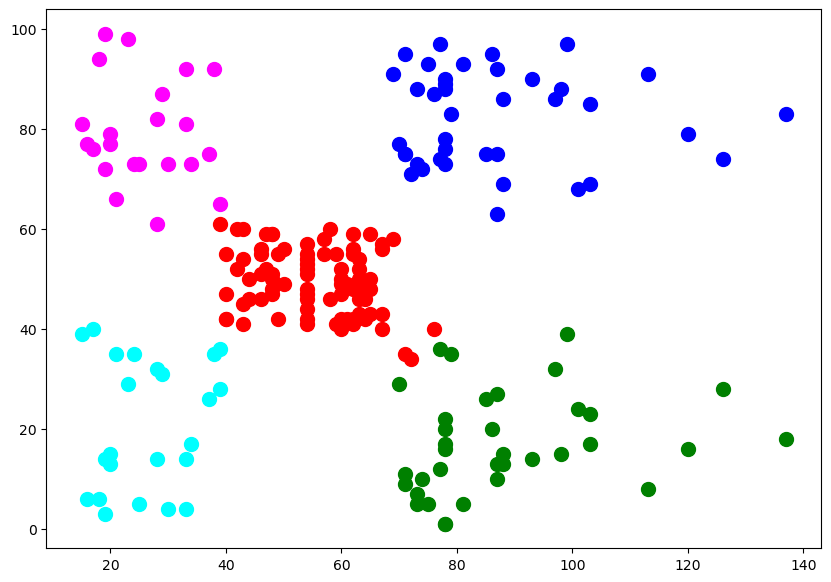

In [43]:
# Étape 12 : Visualisation des points de données sous forme de clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']  # Couleurs pour les clusters

# Tracer chaque cluster
for clusteri in range(optimal_k):
    plt.scatter(
        X[y_pred2 == clusteri, 0],  # Coordonnées X des points dans le cluster
        X[y_pred2 == clusteri, 1],  # Coordonnées Y des points dans le cluster
        s=100, 
        c=colors[clusteri], 
        label=f'Cluster {clusteri}'
    )

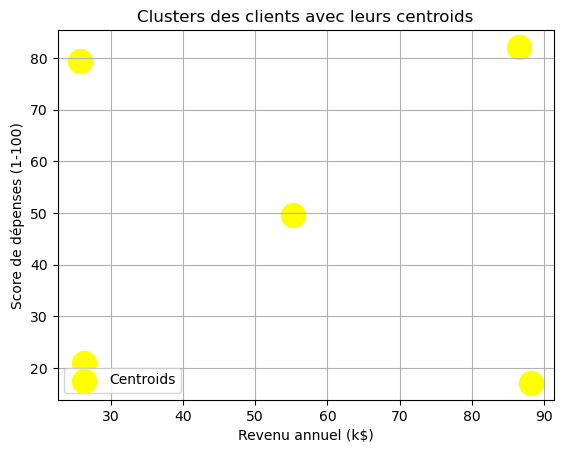

In [45]:
# Étape 13 : Visualisation des centroids
plt.scatter(
    kmeans_model.cluster_centers_[:, 0],  # Coordonnées X des centroids
    kmeans_model.cluster_centers_[:, 1],  # Coordonnées Y des centroids
    s=300, 
    c='yellow', 
    label='Centroids'
)

# Configuration du graphique
plt.title("Clusters des clients avec leurs centroids")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Score de dépenses (1-100)")
plt.legend()
plt.grid()
plt.show()

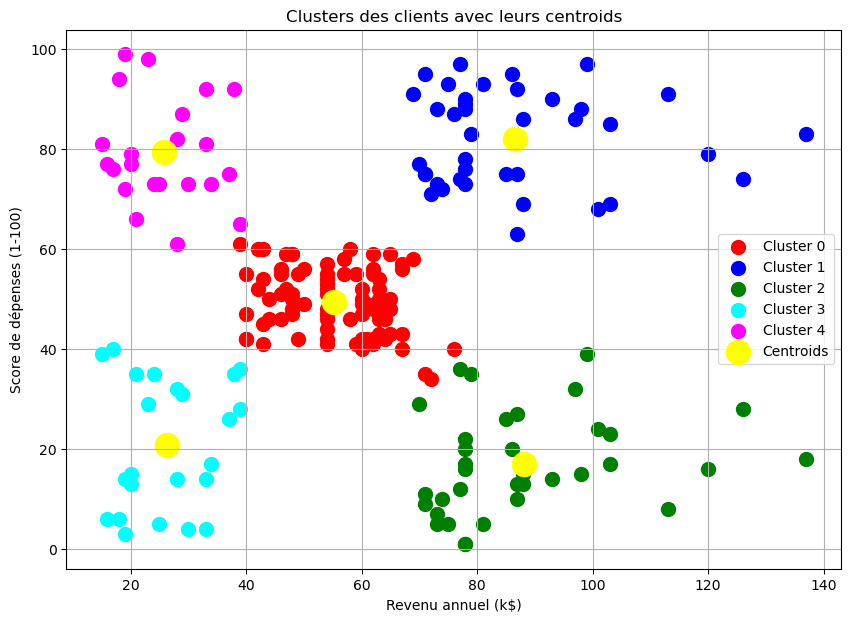

In [47]:
# Étape 14 : Visualisation des clusters avec personnalisation
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']  # Couleurs pour les clusters

# Tracer chaque cluster
for clusteri in range(optimal_k):
    plt.scatter(
        X[y_pred2 == clusteri, 0],  # Coordonnées X des points dans le cluster
        X[y_pred2 == clusteri, 1],  # Coordonnées Y des points dans le cluster
        s=100, 
        c=colors[clusteri], 
        label=f'Cluster {clusteri}'
    )

# Visualisation des centroids
plt.scatter(
    kmeans_model.cluster_centers_[:, 0],  # Coordonnées X des centroids
    kmeans_model.cluster_centers_[:, 1],  # Coordonnées Y des centroids
    s=300, 
    c='yellow', 
    label='Centroids'
)

# Ajouter légende, titre et étiquettes des axes
plt.legend()  # Légende
plt.title("Clusters des clients avec leurs centroids")  # Titre du graphique
plt.xlabel("Revenu annuel (k$)")  # Étiquette de l'axe X
plt.ylabel("Score de dépenses (1-100)")  # Étiquette de l'axe Y
plt.grid()  # Grille pour faciliter la lecture
plt.show()  # Afficher la figure

#### Exercice 2